# Hashtags study-Novax users

## Import

In [1]:
import pandas as pd
import json
import numpy as np
from itertools import repeat

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from concurrent.futures import wait as futures_wait
from concurrent.futures.process import ProcessPoolExecutor

import importlib
import hashtag_util as ut
import sys
sys.path.insert(0, '../')
import general_utils as gen_ut

## Dataset preparation

In [2]:
df = pd.read_csv('../tweets_novax.csv',low_memory=False,
                 usecols=['user_screen_name','hashtags','created_at'])

In [3]:
df['created_at'] = pd.to_datetime(df['created_at'], format="%a %b %d %X %z %Y")

In [4]:
#Creating a map of all hashtags with the number of uses
listHashtags = []

for s in df['hashtags']:    
    [ listHashtags.append(x) for x in gen_ut.get_string_json(s,'text') ]
    
dfHashtags = pd.DataFrame()
dfHashtags['hashtags'] = listHashtags
dfHashtags['count'] = 0

dfHashtags = dfHashtags.groupby('hashtags').count()
dfHashtags.sort_values(['count'],axis = 0,inplace=True,ascending=False)

dfHashtags

,count
hashtags,
vaccino,40214
vaccini,25023
COVID19,18250
AstraZeneca,12912
Pfizer,11718
...,...
appoggiati,1
approfondimento,1
aprireebasta,1


In [5]:
dfUse = ut.process_dfUse(df)
dfUse

,Week/Year,hashtag,count
35629,2020-01-06,AIFA,163
35633,2020-01-06,Brusaferro,1
35634,2020-01-06,Burioni,13
35635,2020-01-06,CercasiCavieUmane,2
35636,2020-01-06,Di,1
...,...,...,...
4038,2021-05-17,Texas,3
4037,2021-05-17,Terroristi,2
4036,2021-05-17,TerapiaGenicaSperimentale,1
4100,2021-05-17,agoràrai,1


## General study

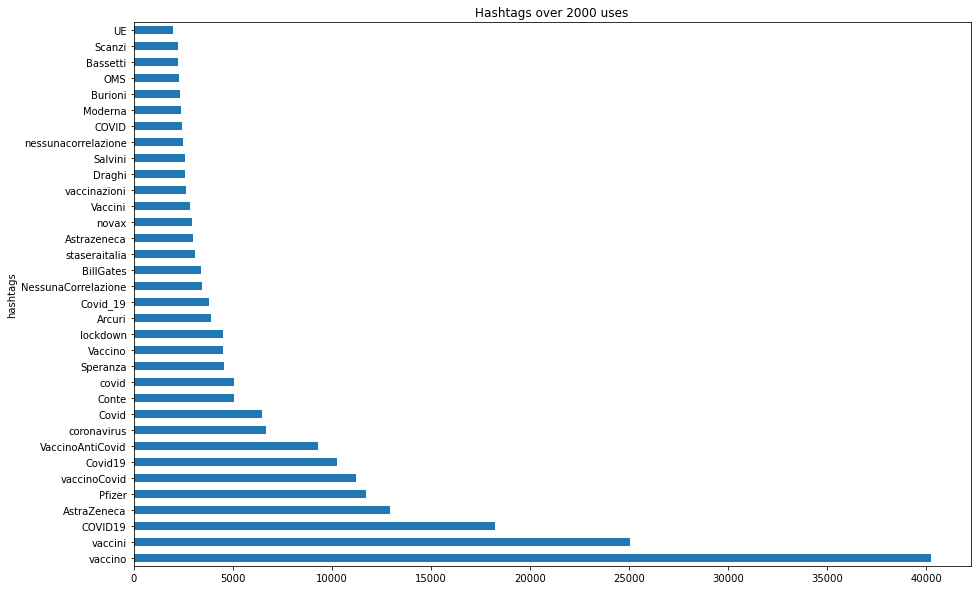

C:\Users\giada\anaconda3\envs\TwitterStudy\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\giada\anaconda3\envs\TwitterStudy\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


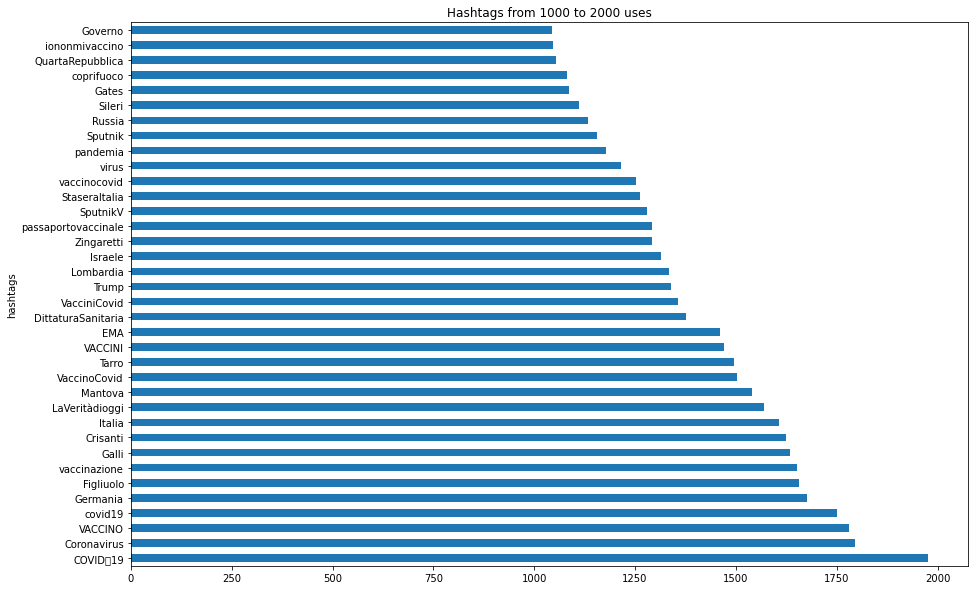

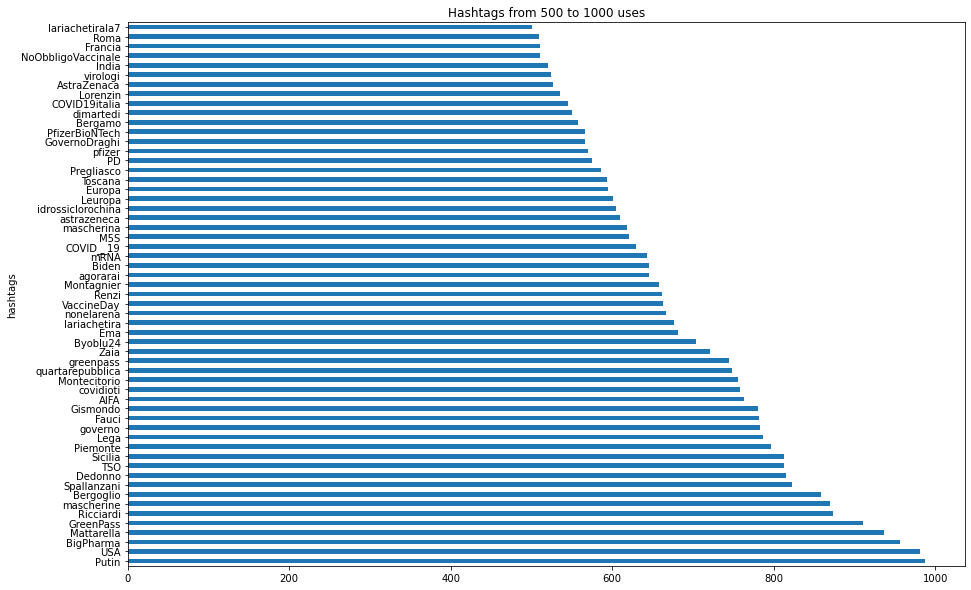

In [6]:
ut.visual_histogram(dfHashtags,2000,1000,500)

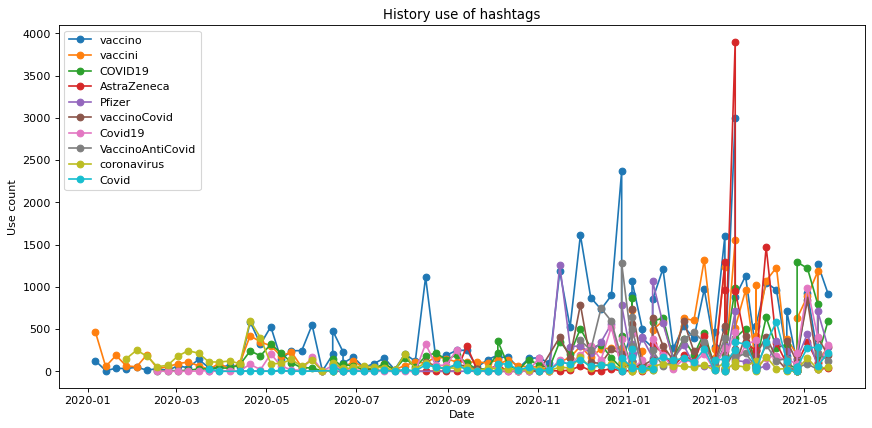

In [7]:
ut.visual_by_date_together(dfHashtags,dfUse)

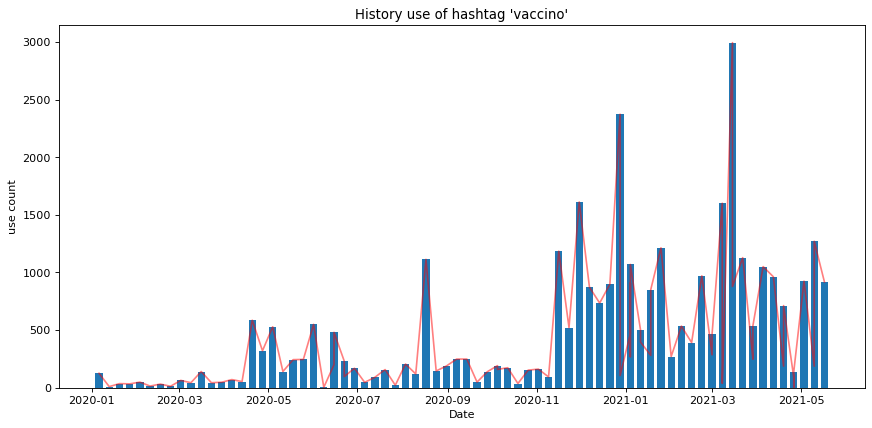

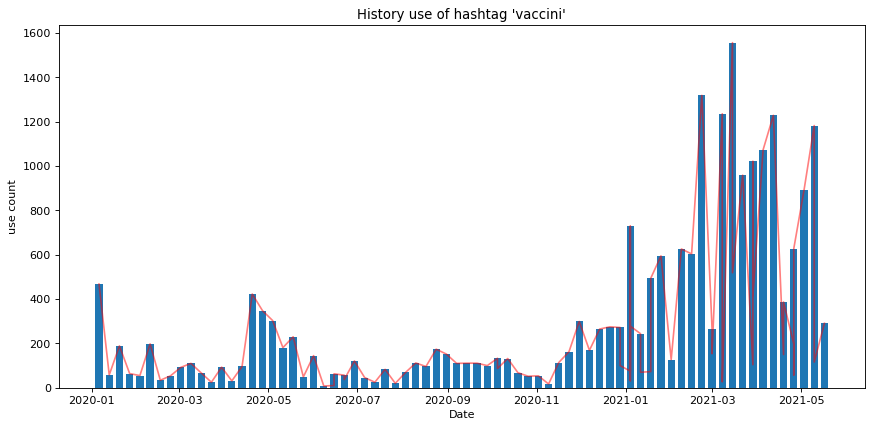

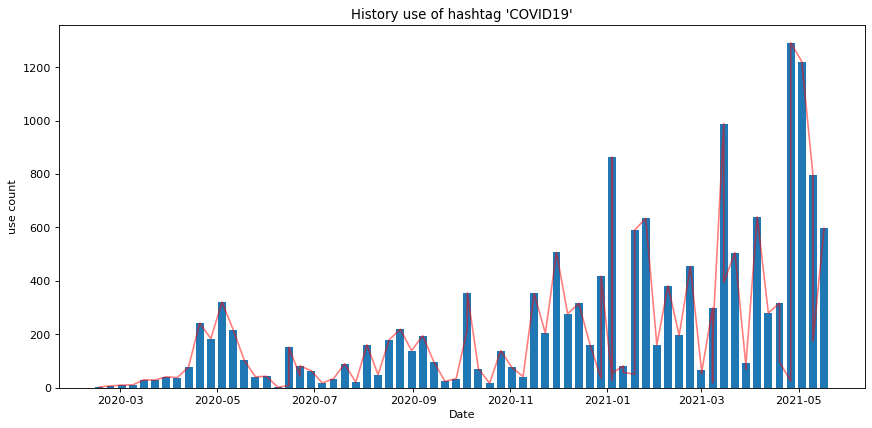

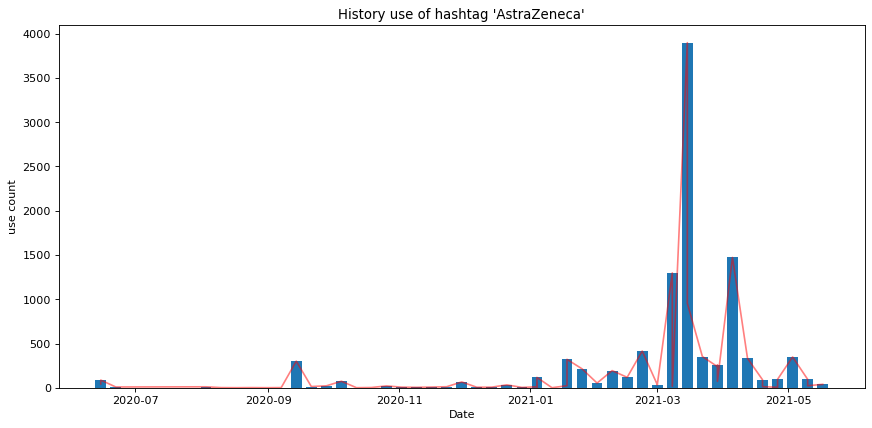

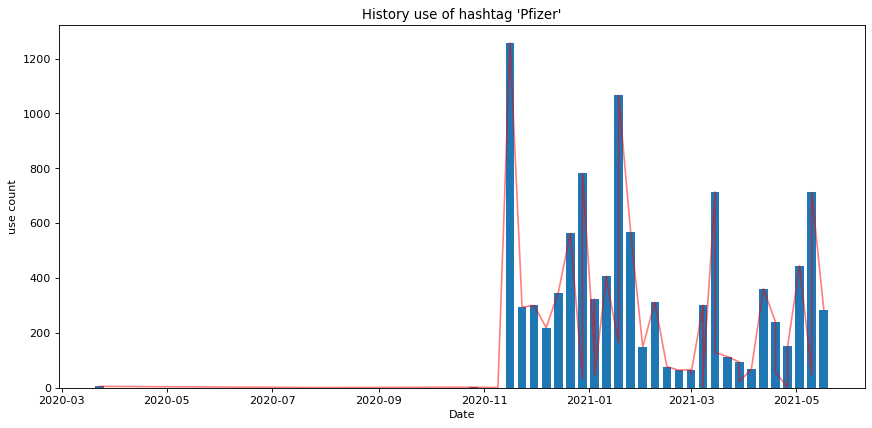

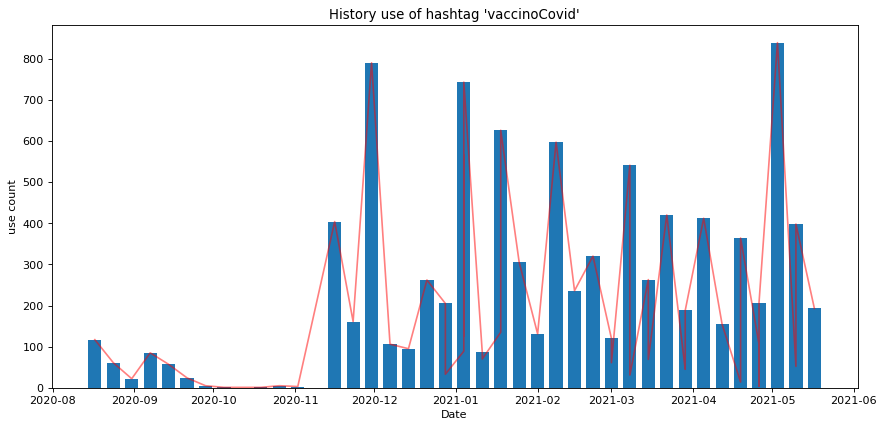

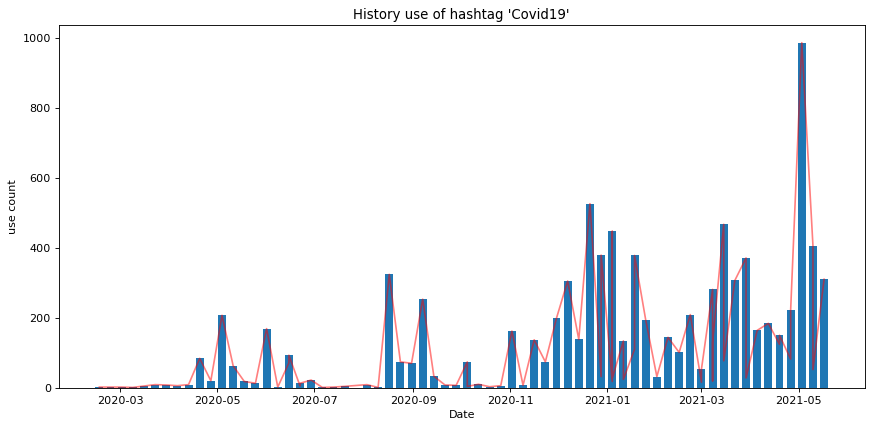

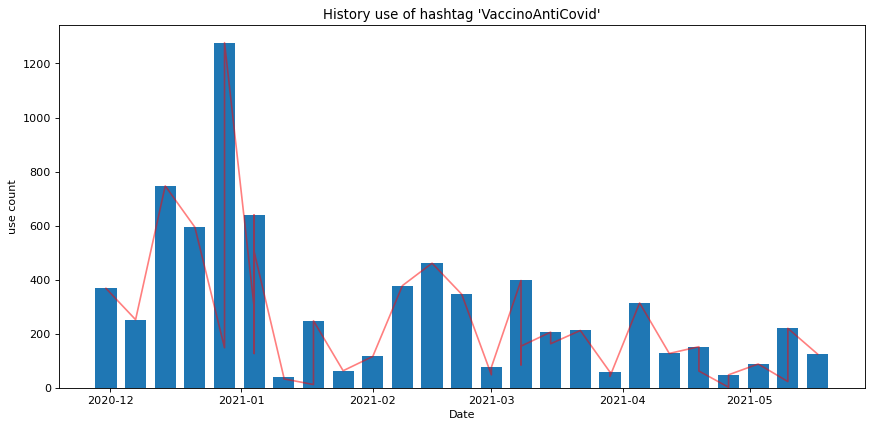

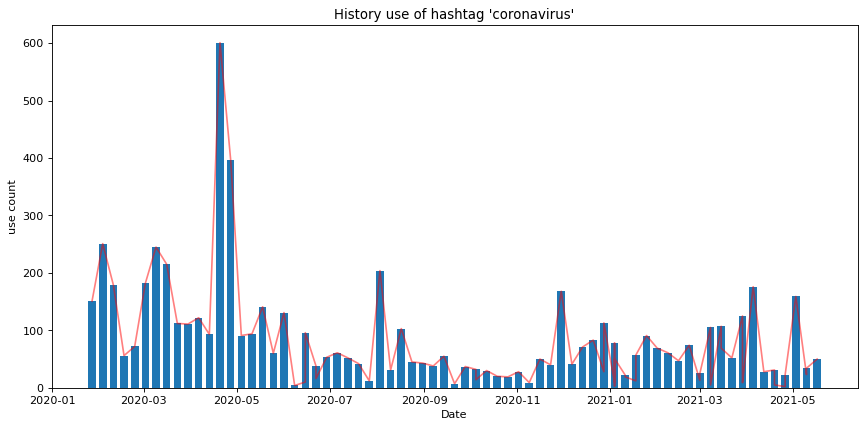

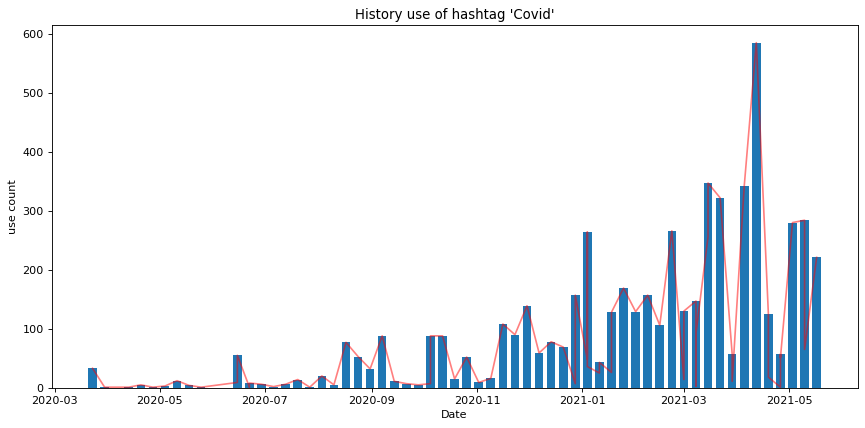

In [8]:
ut.visual_by_date_split(dfHashtags,dfUse)

## Study without some hastag

In [9]:
hastagRemove = ['vaccin.*','covid.*','corona.*','astrazeneca','pfizer','sarscov2','sputnikv','moderna']
dfHashtagFiltered = dfHashtags
for r in hastagRemove:
    mask = dfHashtagFiltered.index.str.lower().str.match(r) == True
    dfHashtagFiltered.drop(dfHashtagFiltered[mask].index, inplace=True)

dfHashtagFiltered

,count
hashtags,
Conte,5087
Speranza,4572
lockdown,4492
Arcuri,3900
NessunaCorrelazione,3458
...,...
appoggiati,1
approfondimento,1
aprireebasta,1


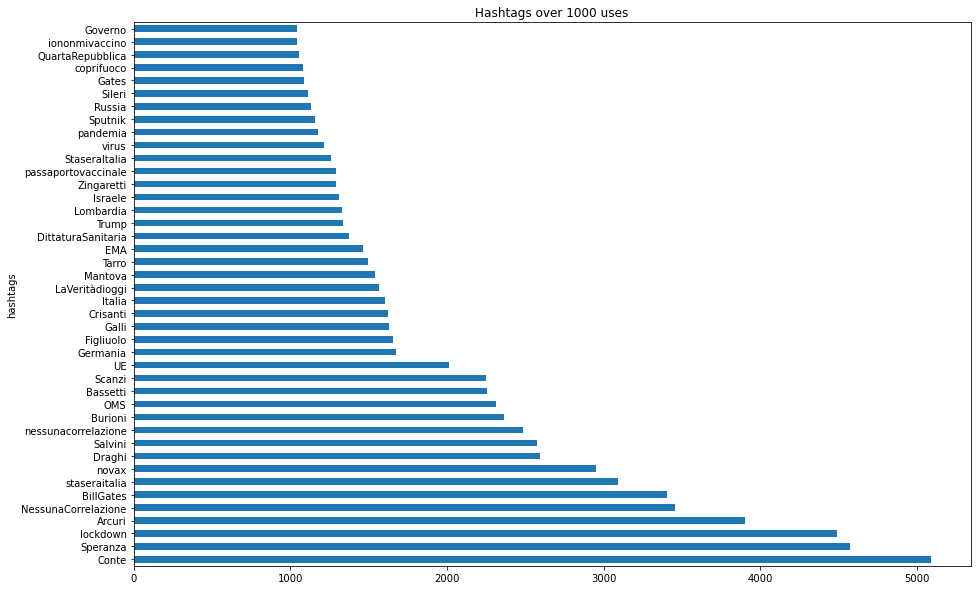

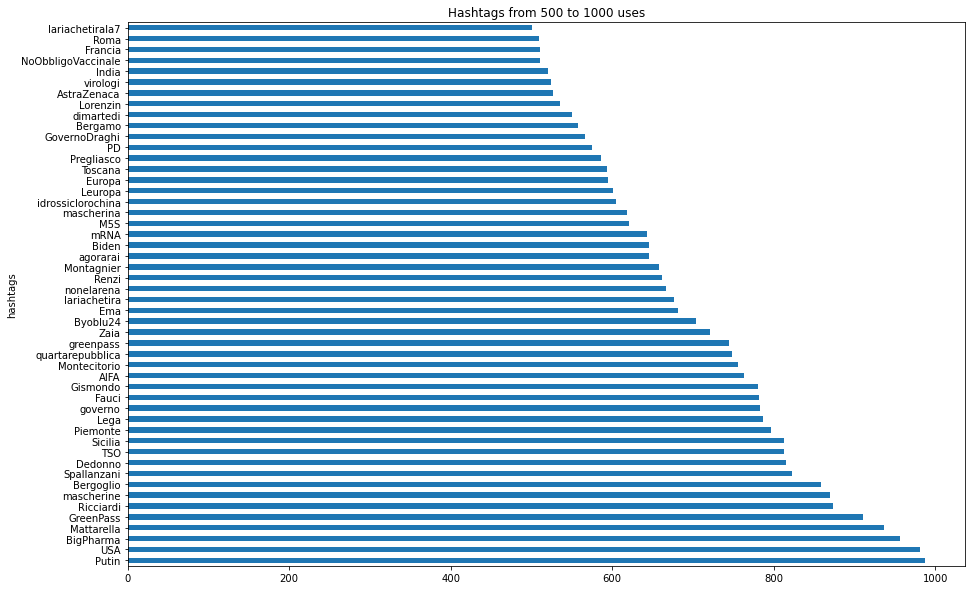

In [10]:
ut.visual_histogram(dfHashtagFiltered,1000,500)

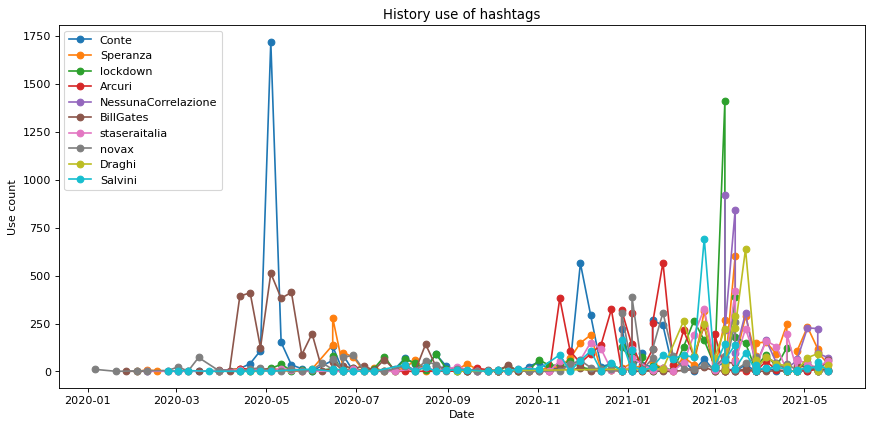

In [11]:
ut.visual_by_date_together(dfHashtagFiltered,dfUse)

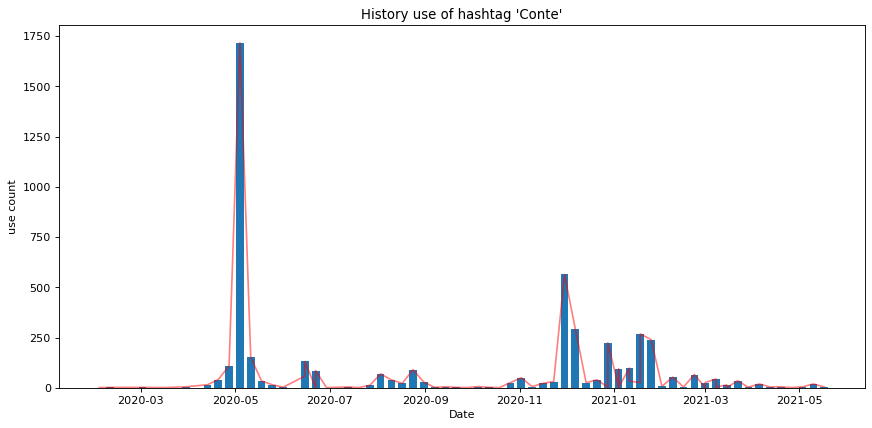

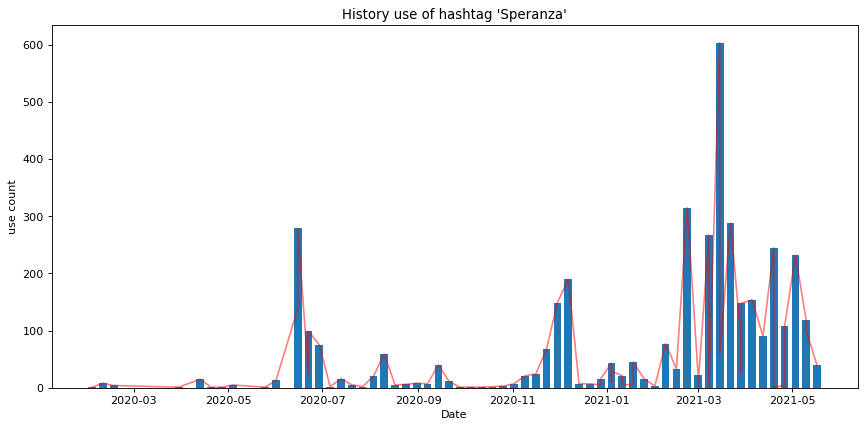

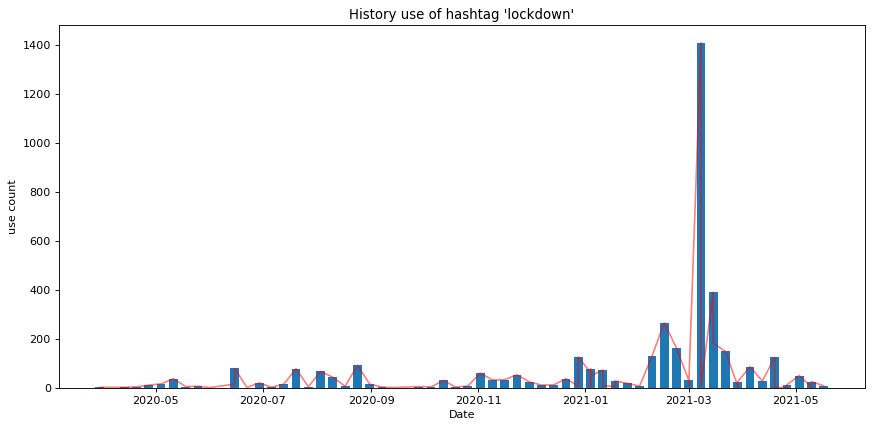

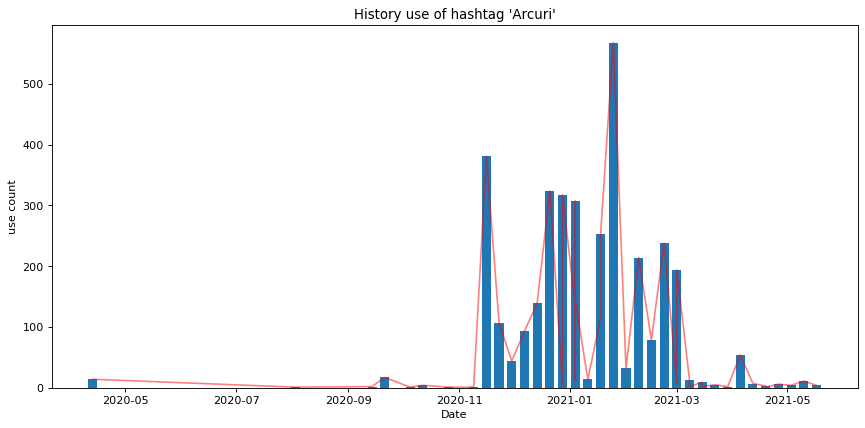

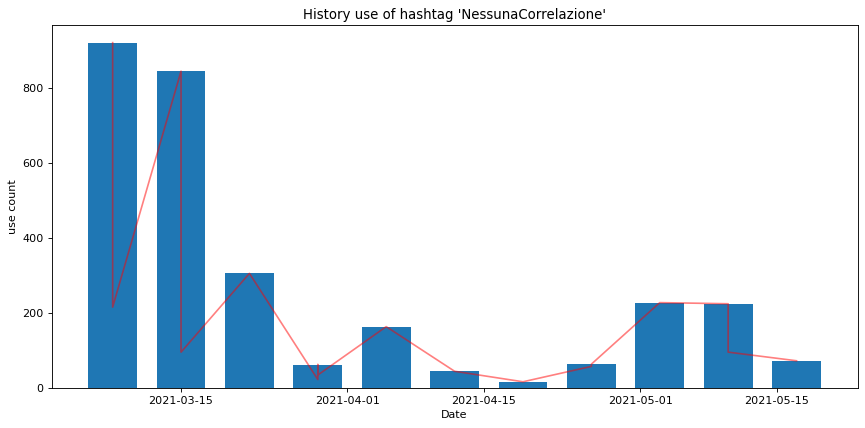

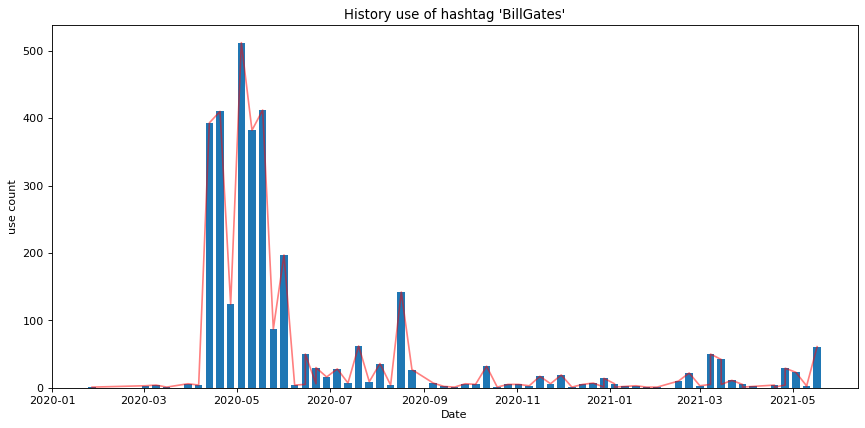

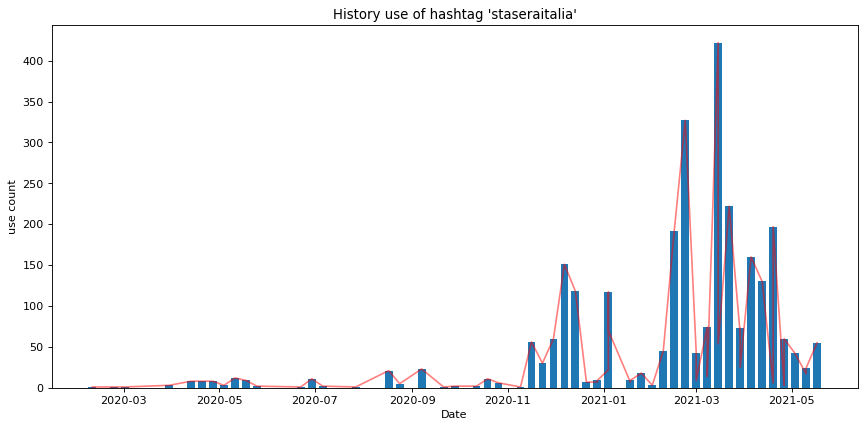

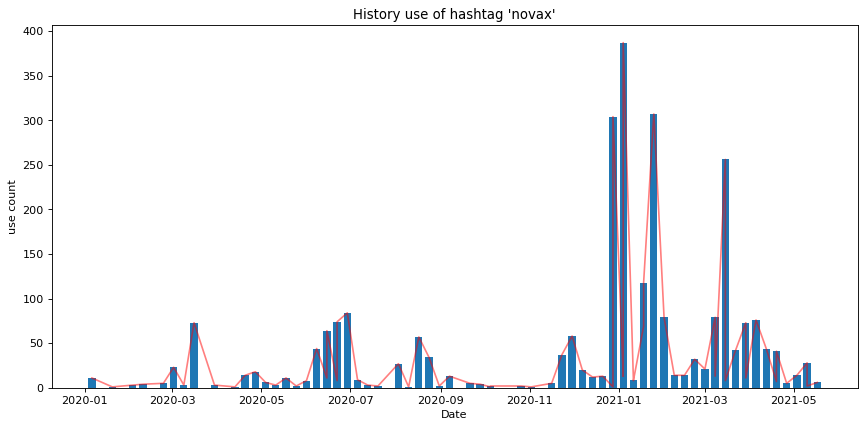

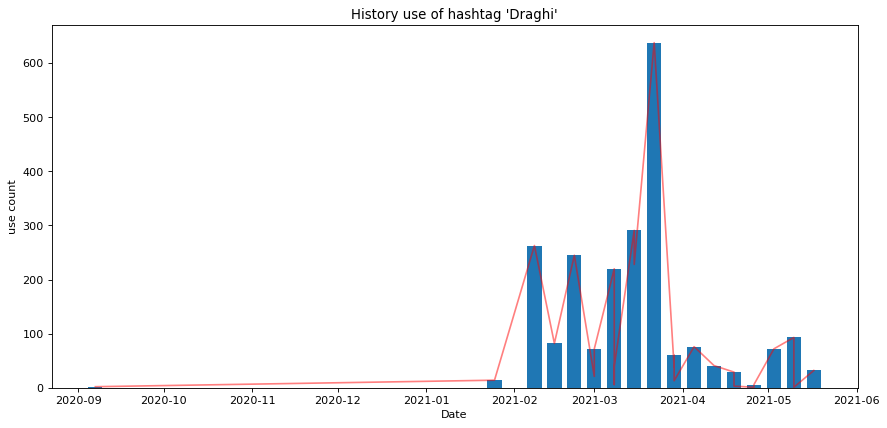

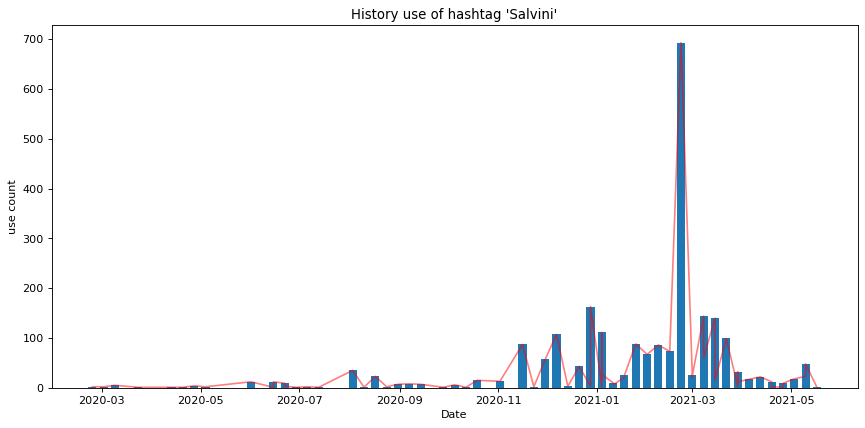

In [12]:
ut.visual_by_date_split(dfHashtagFiltered,dfUse)

## Study without some hastag and hastags about politic

In [13]:
dfMoreFiltered = dfHashtagFiltered
hastagRemove = ['.*lombardia.*','draghi','conte','m5s','mattarella','salvini','speranza','renzi','lega','.*governo.*',
           '.*moratti.*','zingaretti','scanzi','burioni','crisanti']
for r in hastagRemove:
    mask = dfMoreFiltered.index.str.lower().str.match(r) == True
    dfMoreFiltered.drop(dfMoreFiltered[mask].index, inplace=True)

dfMoreFiltered

,count
hashtags,
lockdown,4492
Arcuri,3900
NessunaCorrelazione,3458
BillGates,3403
staseraitalia,3091
...,...
appoggiati,1
approfondimento,1
aprireebasta,1


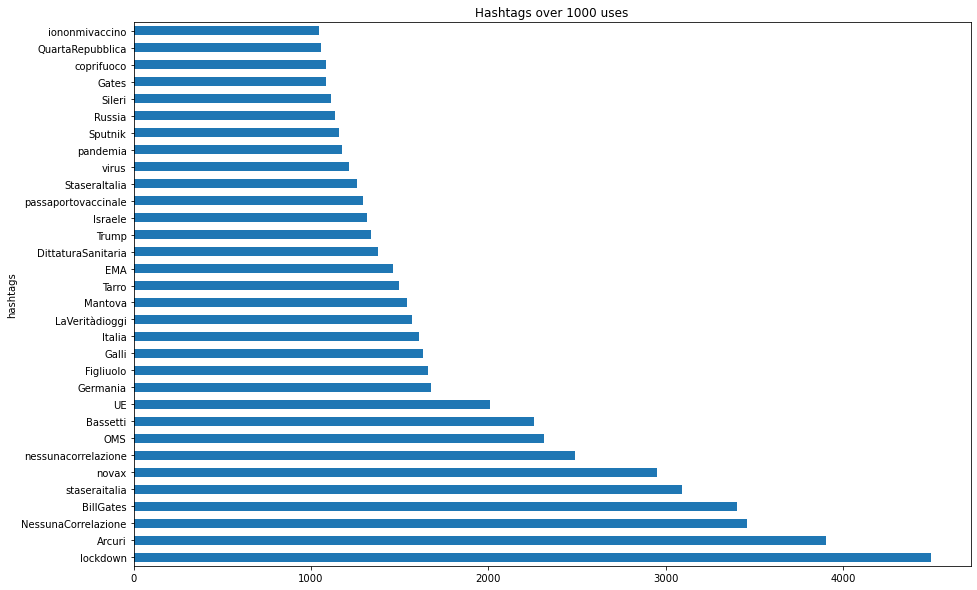

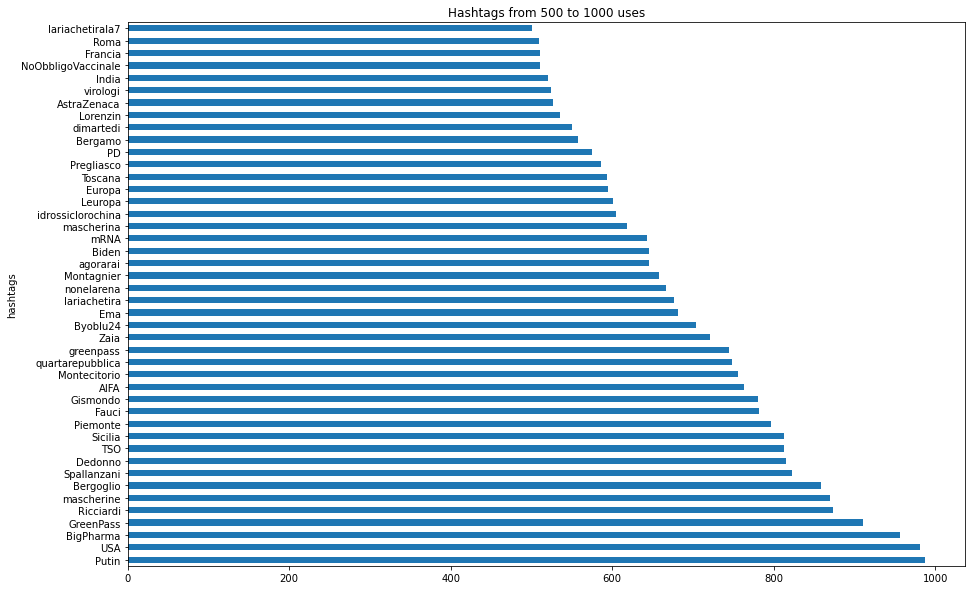

In [14]:
ut.visual_histogram(dfMoreFiltered,1000,500)

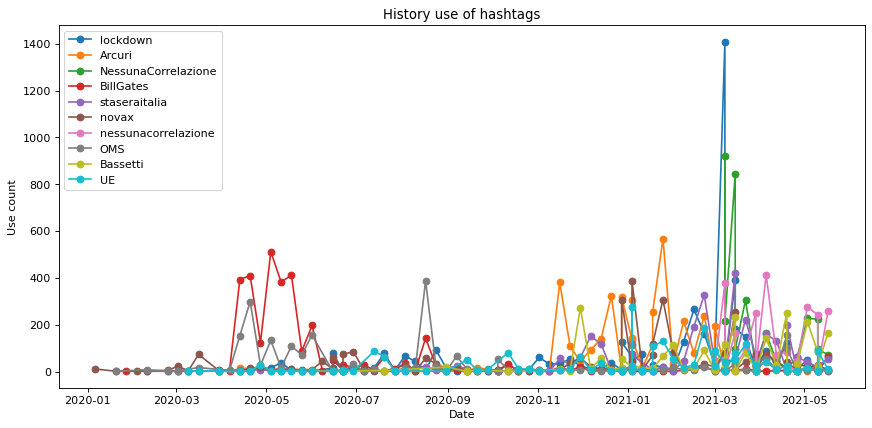

In [15]:
ut.visual_by_date_together(dfMoreFiltered,dfUse)

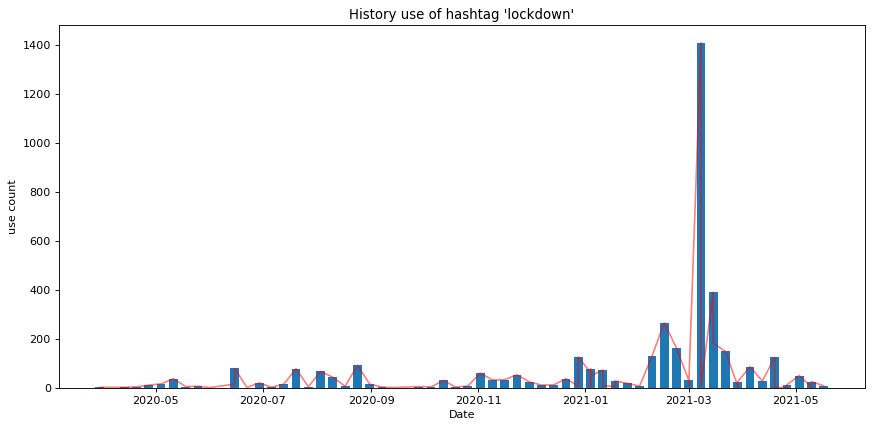

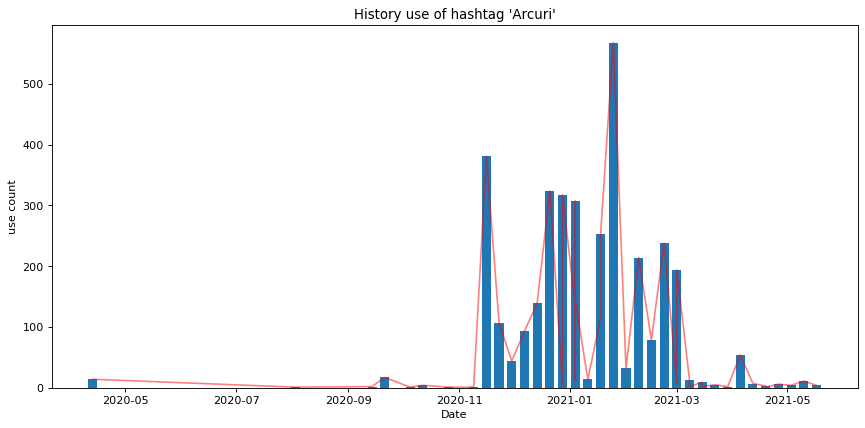

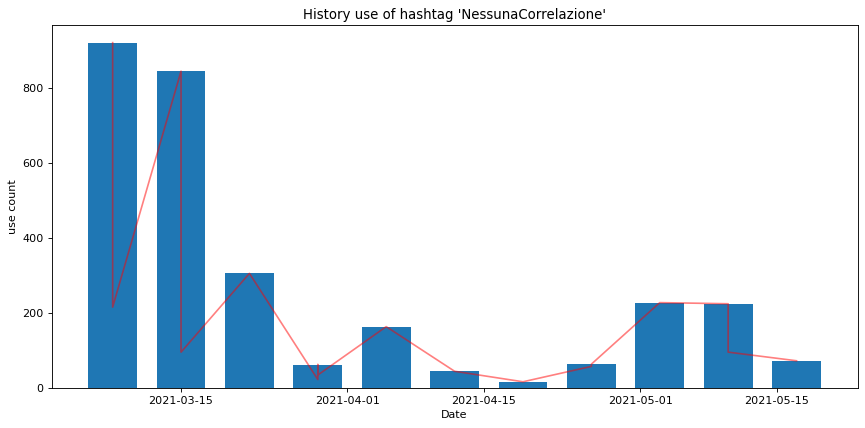

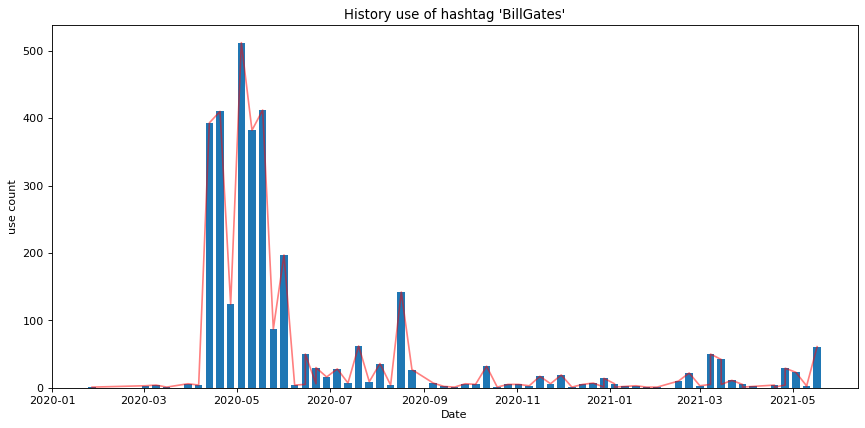

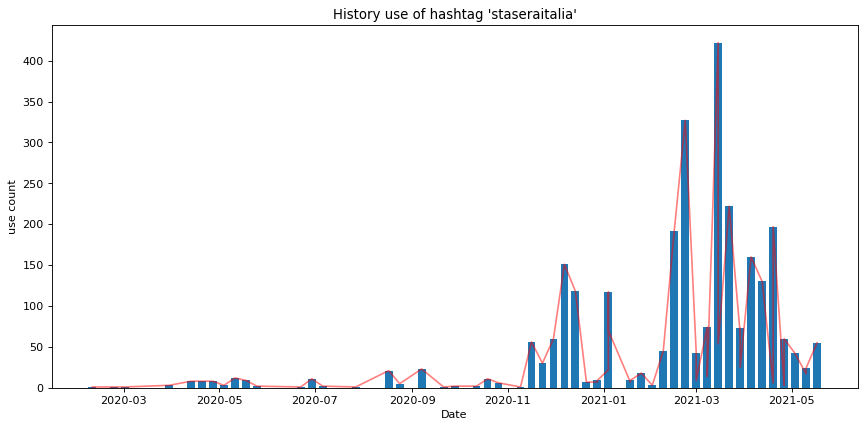

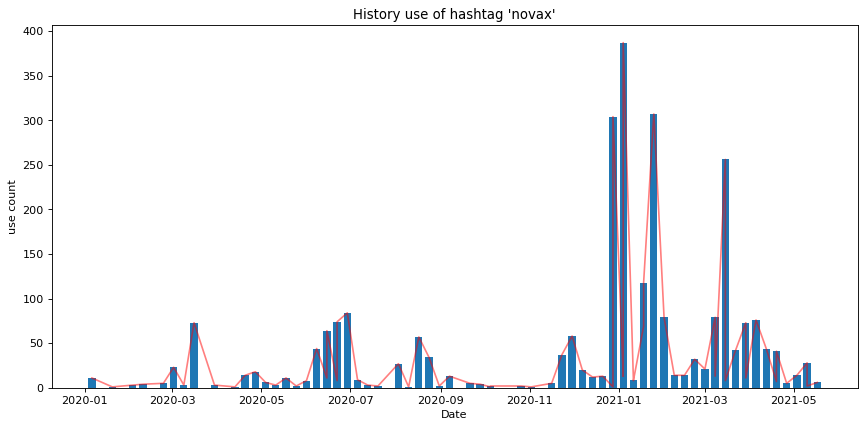

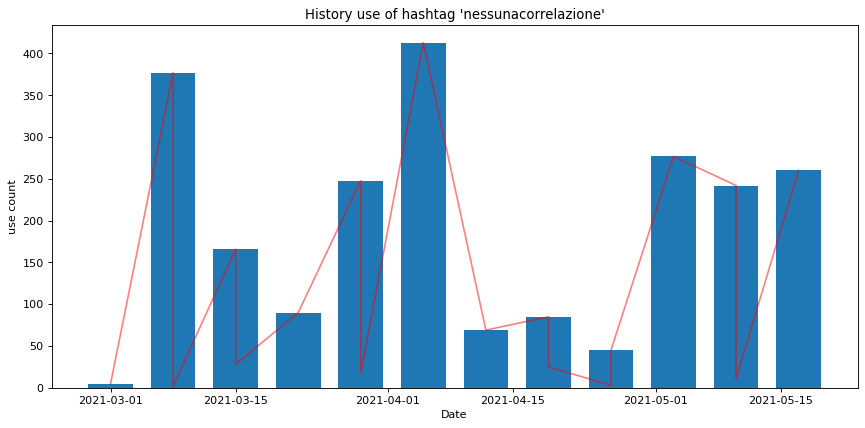

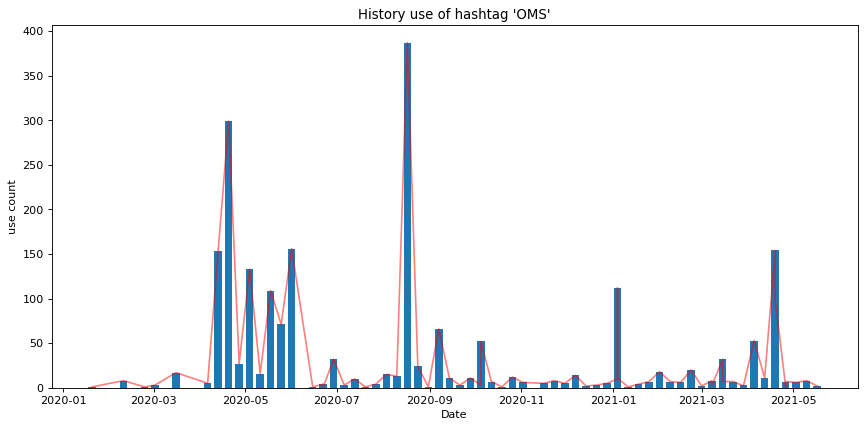

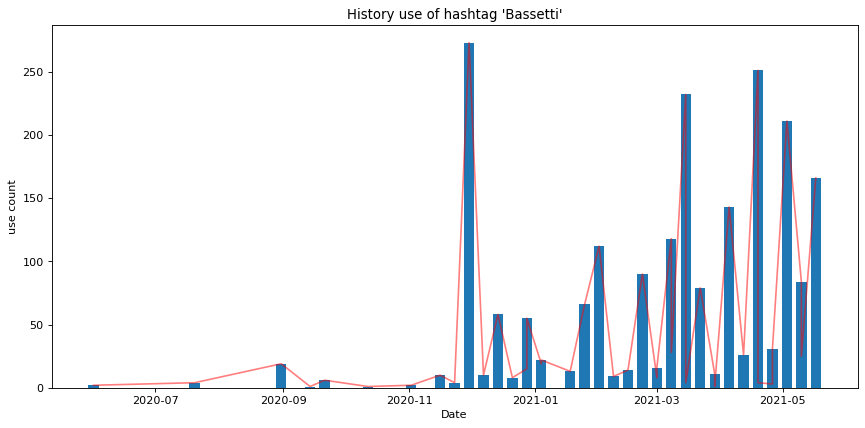

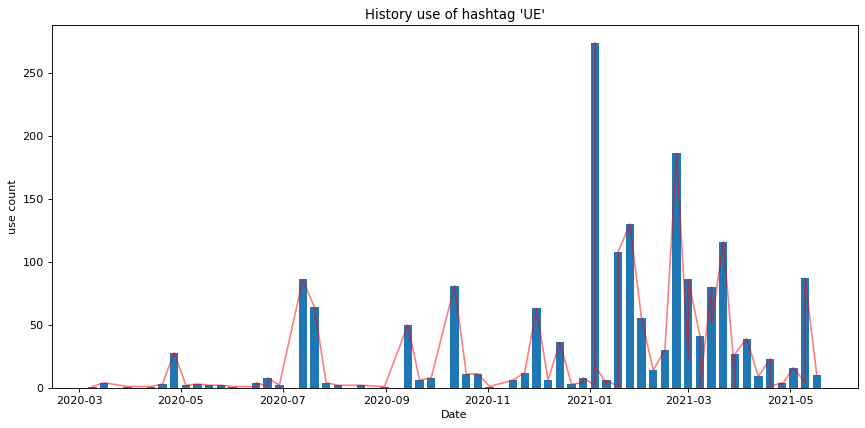

In [16]:
ut.visual_by_date_split(dfMoreFiltered,dfUse)

## Use of 'suspect' hashtag

In [17]:
listHashtagsStudy = ['5g','billgates','dittatura*.','disobbedisco','nessunacorrelazione','byoblu*.']

In [18]:
dfSuspect = pd.DataFrame(index=listHashtagsStudy)
for r in listHashtagsStudy:
    mask = dfMoreFiltered.index.str.lower().str.match(r) == True
    dfSuspect.loc[r,'count'] = sum(dfMoreFiltered.loc[mask,'count'])
dfSuspect.sort_values('count',inplace=True)

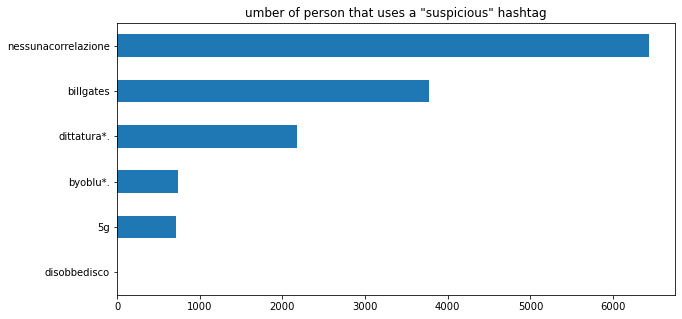

In [19]:
dfSuspect.plot.barh(figsize=(10,5),legend=None,title='umber of person that uses a "suspicious" hashtag')

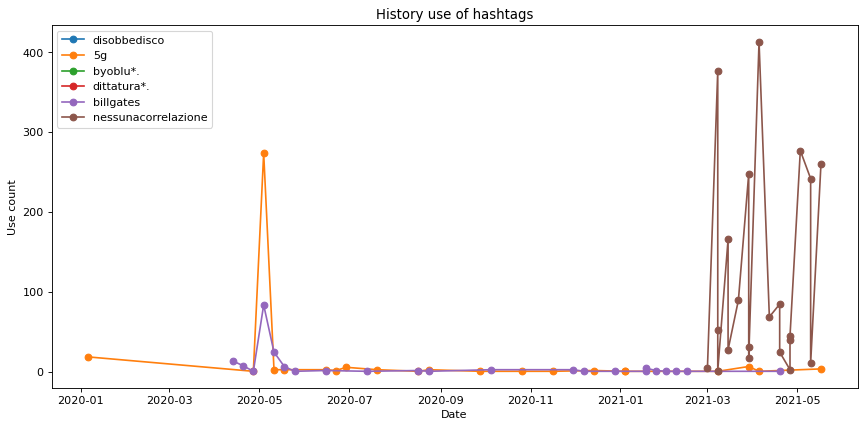

In [20]:
ut.visual_by_date_together(dfSuspect,dfUse)

In [21]:
dfUseSus = ut.process_df_uses_hashtags(df,dfSuspect.index)
dfUseSus = dfUseSus.groupby('user').any()

dfUseSus = ut.hashtagAND(dfSuspect.index,dfUseSus)

for i in range(1,len(listHashtagsStudy)):
    dfUseSus = ut.hashtagOR(dfSuspect.index,dfUseSus,'OR'+str(i),i)

dfUseSus

,disobbedisco,5g,byoblu*.,dittatura*.,billgates,nessunacorrelazione,AND,OR1,OR2,OR3,OR4,OR5
user,,,,,,,,,,,,
00000o0OOOO00,False,False,False,False,False,False,False,False,False,False,False,False
09Espanol,False,False,False,False,False,False,False,False,False,False,False,False
0Zedda,False,False,False,False,False,False,False,False,False,False,False,False
1000whitecranes,False,False,False,False,False,False,False,False,False,False,False,False
10clarenc3,False,False,False,True,False,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
zittononcisto,False,False,False,False,True,False,False,True,False,False,False,False
zizionice,False,False,False,False,False,False,False,False,False,False,False,False
zuccaro_sonia,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
print("Number of account noVax (in dataframe noVax) that uses at least i hashtags")
for i in range (1,6):
    or_i = "OR%d"%i
    dfUseHashtagNovax = dfUseSus[dfUseSus[or_i]]
    print("\ti =",i,":\t",(len(dfUseHashtagNovax) / len(dfUseSus))*100,"%")

Number of account noVax (in dataframe noVax) that uses at least i hashtags
	i = 1 :	 41.789185148268125 %
	i = 2 :	 15.312733615748817 %
	i = 3 :	 5.806130077248941 %
	i = 4 :	 1.8813854971343136 %
	i = 5 :	 0.3862447047096935 %
